#### Applications of OpenCV

- Facial Recognition
- Automated Inspection and Surveillance
- Number of People
- Vehicle counting on highways and their speeds
- Interactive art illustrations
- Anamoly detection in the manufacturing process
- Street view image stitching
- Robot and driverless car navigation and control
- Object recognition
- Medical image analysis
- Movies - 3D Motion
- Advertisement recognition in TVs

#### Functionality

- Image, Video, I/O processing and display (core, imgproc, highgui)
- Feature detection (objdetect, features2d, nonfree)
- Geometry-based monocular or stereo computer vision (calib3d, stitching, videostab)
- Computational photography (photo,video,superres)
- Machine learning and clustering (ml, flann)
- CUDA acceleration (gpu)

In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def PLOT(image):
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)
    cv2.imshow("image", image)
    cv2.waitKey(5000) # 5 sec
    cv2.destroyAllWindows()

In [5]:
imgGray = cv2.imread("I:/Mine/bozo.jpg",0) # Or cv2.IMREAD_GRAYSCALE
PLOT(imgGray)

In [6]:
# Image array
imgGray

array([[ 1,  1,  1, ...,  2,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2],
       [ 1,  1,  1, ...,  2,  2,  2],
       ...,
       [ 0,  0,  0, ..., 11,  5,  0],
       [ 0,  0,  0, ..., 11,  5,  0],
       [ 1,  1,  1, ...,  3,  3,  3]], dtype=uint8)

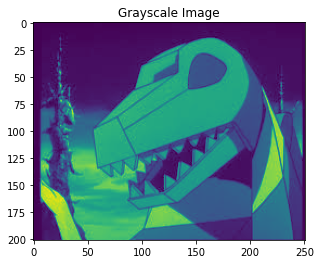

In [7]:
plt.imshow(imgGray)
plt.title("Grayscale Image")
plt.show() # Not gray?

In [8]:
imgColor = cv2.imread("I:/Mine/Bozo.jpg", 1)
PLOT(imgColor)

In [9]:
imgColor

array([[[ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 2,  3,  1]],

       [[ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 2,  3,  1]],

       [[ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 2,  3,  1]],

       ...,

       [[ 4,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [16, 11, 10],
        [ 9,  5,  4],
        [ 2,  0,  0]],

       [[ 4,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [15, 11, 10],
        [ 7,  5,  4],
        [ 0,  1,  0]],

       [[ 5,  1,  0],
        [ 3,  1,  0],
        [ 3,  1,  0],
        ...,
        [ 7,  3,  2],
        [ 5,  3,  2],
        [ 3,  4,  2]]], dtype=uint8)

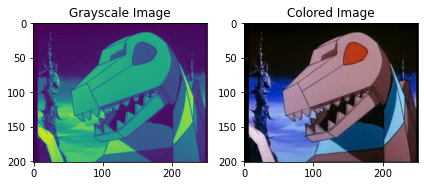

In [10]:
plt.subplot(121)
plt.imshow(imgGray)
plt.title("Grayscale Image")

plt.subplot(122)
plt.imshow(imgColor)
plt.title("Colored Image")

plt.tight_layout()
plt.show()

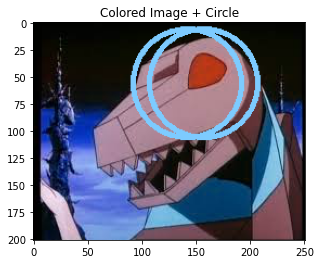

In [11]:
# Circle modifies the original image rather than making a copy of said image; pass-by-reference

imgColor2 = cv2.imread("I:/Mine/Bozo.jpg", 1)
circle=cv2.circle(imgColor2, (157, 56), 50, (125,203,255),3)
circle2=cv2.circle(imgColor2, (142, 56), 50, (125,203,255),3)
plt.imshow(imgColor2)
plt.title("Colored Image + Circle")
plt.show()

In [12]:
status = cv2.imwrite("bozo_circle.jpg", circle)
print("Image written to file-system : ",status)

Image written to file-system :  True


In [13]:
PLOT(imgColor) # Original colors unlike plt

In [14]:
imgColor.shape

(201, 251, 3)

In [15]:
imgGray.shape

(201, 251)

In [16]:
dimensions = imgColor.shape
height = imgColor.shape[0]
width = imgColor.shape[1]
channels = imgColor.shape[2]

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels) # Otherwise known as the number of components/layers that represent each pixel

Image Dimension    :  (201, 251, 3)
Image Height       :  201
Image Width        :  251
Number of Channels :  3


In [17]:
"""
Image Geometry takes the form of spatial relationships between the pixels or pixel groups of an image. Geometric operations alter the location
of each pixel while preserving pixel neighborhoods to a certain extent.

These operations are a necessary means if imaging process is hampered by geometric distortions, an example being a high-res airborne scanner 
producting distorted images due to changes in velocity, altitude, attitude, etc.
"""

'\nImage Geometry takes the form of spatial relationships between the pixels or pixel groups of an image. Geometric operations alter the location\nof each pixel while preserving pixel neighborhoods to a certain extent.\n\nThese operations are a necessary means if imaging process is hampered by geometric distortions, an example being a high-res airborne scanner \nproducting distorted images due to changes in velocity, altitude, attitude, etc.\n'

In [18]:
img = cv2.imread("I:/Mine/bozo.jpg", cv2.IMREAD_UNCHANGED)
print("OG Dimensions :", img.shape)

OG Dimensions : (201, 251, 3)


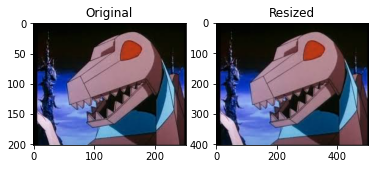

In [19]:

def resizeImg(image, scale):
    width = int(image.shape[1] * scale/100) 
    height = int(image.shape[0] * scale/100)
    dim = (width, height)

    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

plt.subplot(121), plt.imshow(img)
plt.title("Original")
plt.subplot(122), plt.imshow(resizeImg(img, 200))
plt.title("Resized")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

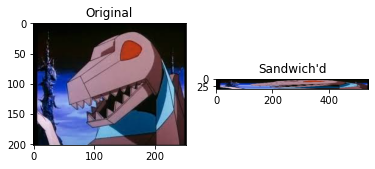

In [20]:
# No aspect ratio
width = 540
height = 34
dim = (width, height)

no_ratio = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.subplot(121), plt.imshow(img)
plt.title("Original")
plt.subplot(122), plt.imshow(no_ratio)
plt.title("Sandwich'd")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

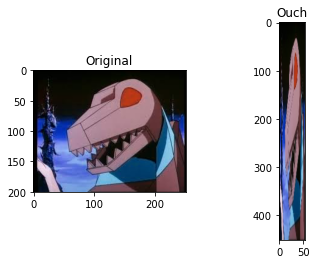

In [21]:
width = 54
height = 452
dim = (width, height)

no_ratio = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.subplot(121), plt.imshow(img)
plt.title("Original")
plt.subplot(122), plt.imshow(no_ratio)
plt.title("Ouch")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

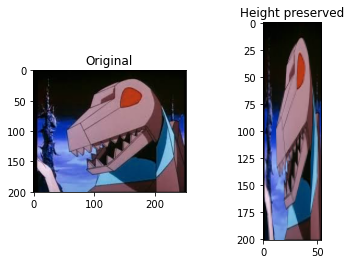

In [22]:
width = 54
height = img.shape[0]
dim = (width, height)

no_ratio = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.subplot(121), plt.imshow(img)
plt.title("Original")
plt.subplot(122), plt.imshow(no_ratio)
plt.title("Height preserved")

plt.show

In [23]:
"""
Translation is shifting an object's location from one point to another via a matrix.
"""

"\nTranslation is shifting an object's location from one point to another via a matrix.\n"

Text(0.5, 1.0, 'Peeking')

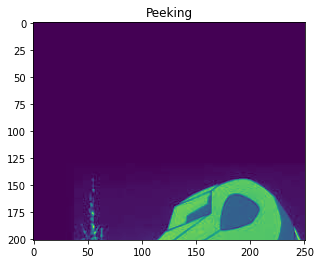

In [24]:
import numpy as np
import cv2 as cv
img = cv.imread("I:/Mine/bozo.jpg",0) # Two-dimensions required?
rows,cols = img.shape
M = np.float32([[1,0,30],[0,1,130]])
dst = cv.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
plt.title("Peeking")

In [29]:
img = cv2.imread("I:/Mine/bozo.jpg",0)
rows,col = img.shape

M = cv2.getRotationMatrix2D(((cols-1)/2, (rows-1)/2), 90,1)
dst = cv2.warpAffine(img,M,(rows,col))
PLOT(dst)

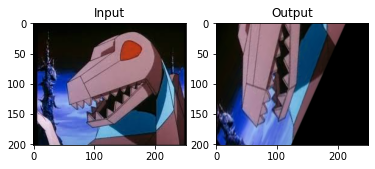

In [35]:
import numpy as np

img = cv2.imread("I:/Mine/bozo.jpg")
rows, cols, ch = img.shape

pst1 = np.float32([[50,50],
                  [200,210],
                  [50,200]])

pst2 = np.float32([[10, 100],
                    [200,50],
                    [100,250]])

M = cv2.getAffineTransform(pst1,pst2)
dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
  
plt.show()

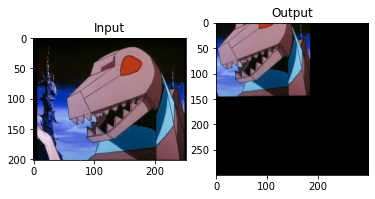

In [50]:
img = cv2.imread("I:/Mine/bozo.jpg")
rows,cols,ch = img.shape

pts1 = np.float32([[56,48],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

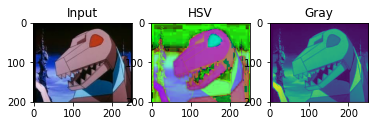

In [52]:
img = cv2.imread("I:/Mine/bozo.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.subplot(131),plt.imshow(img),plt.title('Input')
plt.subplot(132),plt.imshow(hsv),plt.title('HSV')
plt.subplot(133),plt.imshow(gray),plt.title('Gray')
plt.show()

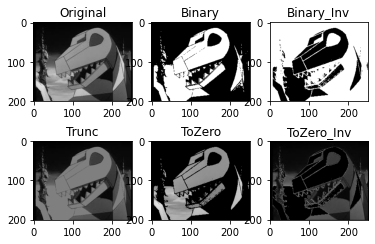

In [56]:
img = cv2.imread("I:/Mine/bozo.jpg",0)

ret,thresh1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary_Inv', 'Trunc', 'ToZero', 'ToZero_Inv']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    #plt.xticks([]), plt.yticks([])
plt.show() # Me Grimlock uncanny

In [57]:
# Image Histogram

img = cv2.imread("I:/Mine/bozo.jpg", 0)
hist = cv.calcHist([img], [0], None, [256], [0,256])
hist

array([[6.310e+02],
       [9.130e+02],
       [8.160e+02],
       [1.129e+03],
       [8.660e+02],
       [8.600e+02],
       [7.100e+02],
       [9.290e+02],
       [1.183e+03],
       [2.343e+03],
       [1.462e+03],
       [7.090e+02],
       [7.060e+02],
       [5.480e+02],
       [5.310e+02],
       [3.630e+02],
       [3.160e+02],
       [2.800e+02],
       [2.810e+02],
       [2.430e+02],
       [2.390e+02],
       [2.520e+02],
       [1.810e+02],
       [2.680e+02],
       [2.010e+02],
       [1.720e+02],
       [1.270e+02],
       [1.300e+02],
       [1.350e+02],
       [9.800e+01],
       [1.230e+02],
       [1.350e+02],
       [1.170e+02],
       [1.230e+02],
       [1.320e+02],
       [1.980e+02],
       [1.720e+02],
       [1.450e+02],
       [1.610e+02],
       [1.300e+02],
       [1.440e+02],
       [1.810e+02],
       [1.370e+02],
       [1.370e+02],
       [1.640e+02],
       [1.780e+02],
       [1.440e+02],
       [2.040e+02],
       [1.590e+02],
       [1.470e+02],


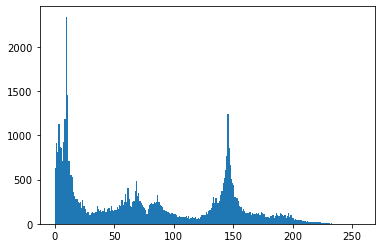

In [60]:
xaxis = np.arange(256).reshape(256,1)
histogram = np.hstack((xaxis, hist)).astype(int)
plt.hist(img.flatten(), 256, [0,256])
plt.show()

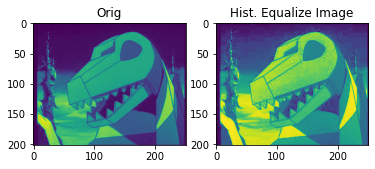

In [63]:
# Histogram equalization

img = cv2.imread("I:/Mine/bozo.jpg", 0)

equ_img = cv2.equalizeHist(img)

plt.subplot(121), plt.imshow(img)
plt.title("Orig")

plt.subplot(122), plt.imshow(equ_img)
plt.title("Hist. Equalize Image")
plt.show()